In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import TruncatedSVD
import random
import seaborn as sns
import os.path as path
import os
import matplotlib
import matplotlib.font_manager
import matplotlib.pyplot as plt # graphs plotting
from Bio import SeqIO # some BioPython that will come in handy
#matplotlib inline
import numpy
import csv 

from matplotlib import rc

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import svm

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler  
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import classification_report, confusion_matrix 

from sklearn.neighbors import KNeighborsClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from pandas import DataFrame

from sklearn.model_selection import KFold 
from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import confusion_matrix

from numpy import mean


from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

import statistics

from sklearn.cluster import KMeans

from sklearn.datasets import load_digits
from sklearn.decomposition import KernelPCA

import math
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import confusion_matrix
from sklearn.manifold import TSNE

import matplotlib.cm as cm
import seaborn as sns

# for Arial typefont
matplotlib.rcParams['font.family'] = 'Arial'


print("Packages imported")

Packages imported


In [12]:
# name = "OHE_original_preprocessed_8172"
# seq_data = np.load("E:/RA/ISBRA_Adversarial_Attack/Dataset/" + name + ".npy",allow_pickle=True)
# attribute_data = np.load("E:/RA/ISBRA_Adversarial_Attack/Dataset/variant_names__8172.npy",allow_pickle=True)

# dataset_path = "E:/RA/Poincare_Kernel/Dataset/"
# # name = "first_kmers_freq_vec_seq_data_7000_Poincare_Kernel_PCA_Embedding_Original"
# name = "first_kmers_freq_vec_seq_data_7000_Poincare_Kernel_PCA_Embedding_Modified"
# variant_name = "seq_data_variant_names_7000"
# attr_path = "E:/RA/IJCAI/Dataset/Original/"

# dataset_path = "E:/RA/Poincare_Kernel/Dataset/"
# # name = "Spike2Vec_Human_DNA_Data_sequences_4380_Poincare_Kernel_PCA_Embedding_Original"
# name = "Spike2Vec_Human_DNA_Data_sequences_4380_Poincare_Kernel_PCA_Embedding_Modified"
# variant_name = "Human_DNA_Data_attributes_4380_names"
# attr_path = "E:/RA/Pitari/DNA-Sequence-Machine-learning-master/"


dataset_path = "E:/RA/Antigene_Antibody/Dataset/New/"
# name = "Spike2Vec_on_unaligned_for_Host_Classification_Data_5558_seq_Poincare_Kernel_PCA_Embedding_Original"
# name = "nanobody_kmers_embedding"
name = "antigene_kmers_embedding"

variant_name = "labels_full_3481"
attr_path = "E:/RA/Antigene_Antibody/Dataset/New/"

seq_data = np.load(dataset_path + name + ".npy",allow_pickle=True)
attr_new = np.load(attr_path + variant_name + ".npy",allow_pickle=True)

attribute_data = []
for i in range(len(attr_new)):
    aa = str(attr_new[i]).replace("[","")
    aa_1 = aa.replace("]","")
    aa_2 = aa_1.replace("\'","")
    attribute_data.append(aa_2)
    
print("Done")

Done


In [13]:
# attribute_data

In [14]:
idx = pd.Index(attribute_data) # creates an index which allows counting the entries easily
print('Here are all of the viral species in the dataset: \n', len(idx),"entries in total")
aq = idx.value_counts()
# k_mers_final = aq.values
# k_mers_final
aq

Here are all of the viral species in the dataset: 
 3481 entries in total


Yes    1753
No     1728
dtype: int64

In [15]:
attr_new

array(['Yes', 'Yes', 'Yes', ..., 'Yes', 'Yes', 'Yes'], dtype='<U3')

In [16]:
attr = np.array(np.unique(attribute_data))
# attribute_data

In [17]:
# We embed all our sequences into 2D vectors with help of TSNE
X_embedded = TSNE(n_components = 2, perplexity = 30, random_state = 1).fit_transform(np.array(seq_data))

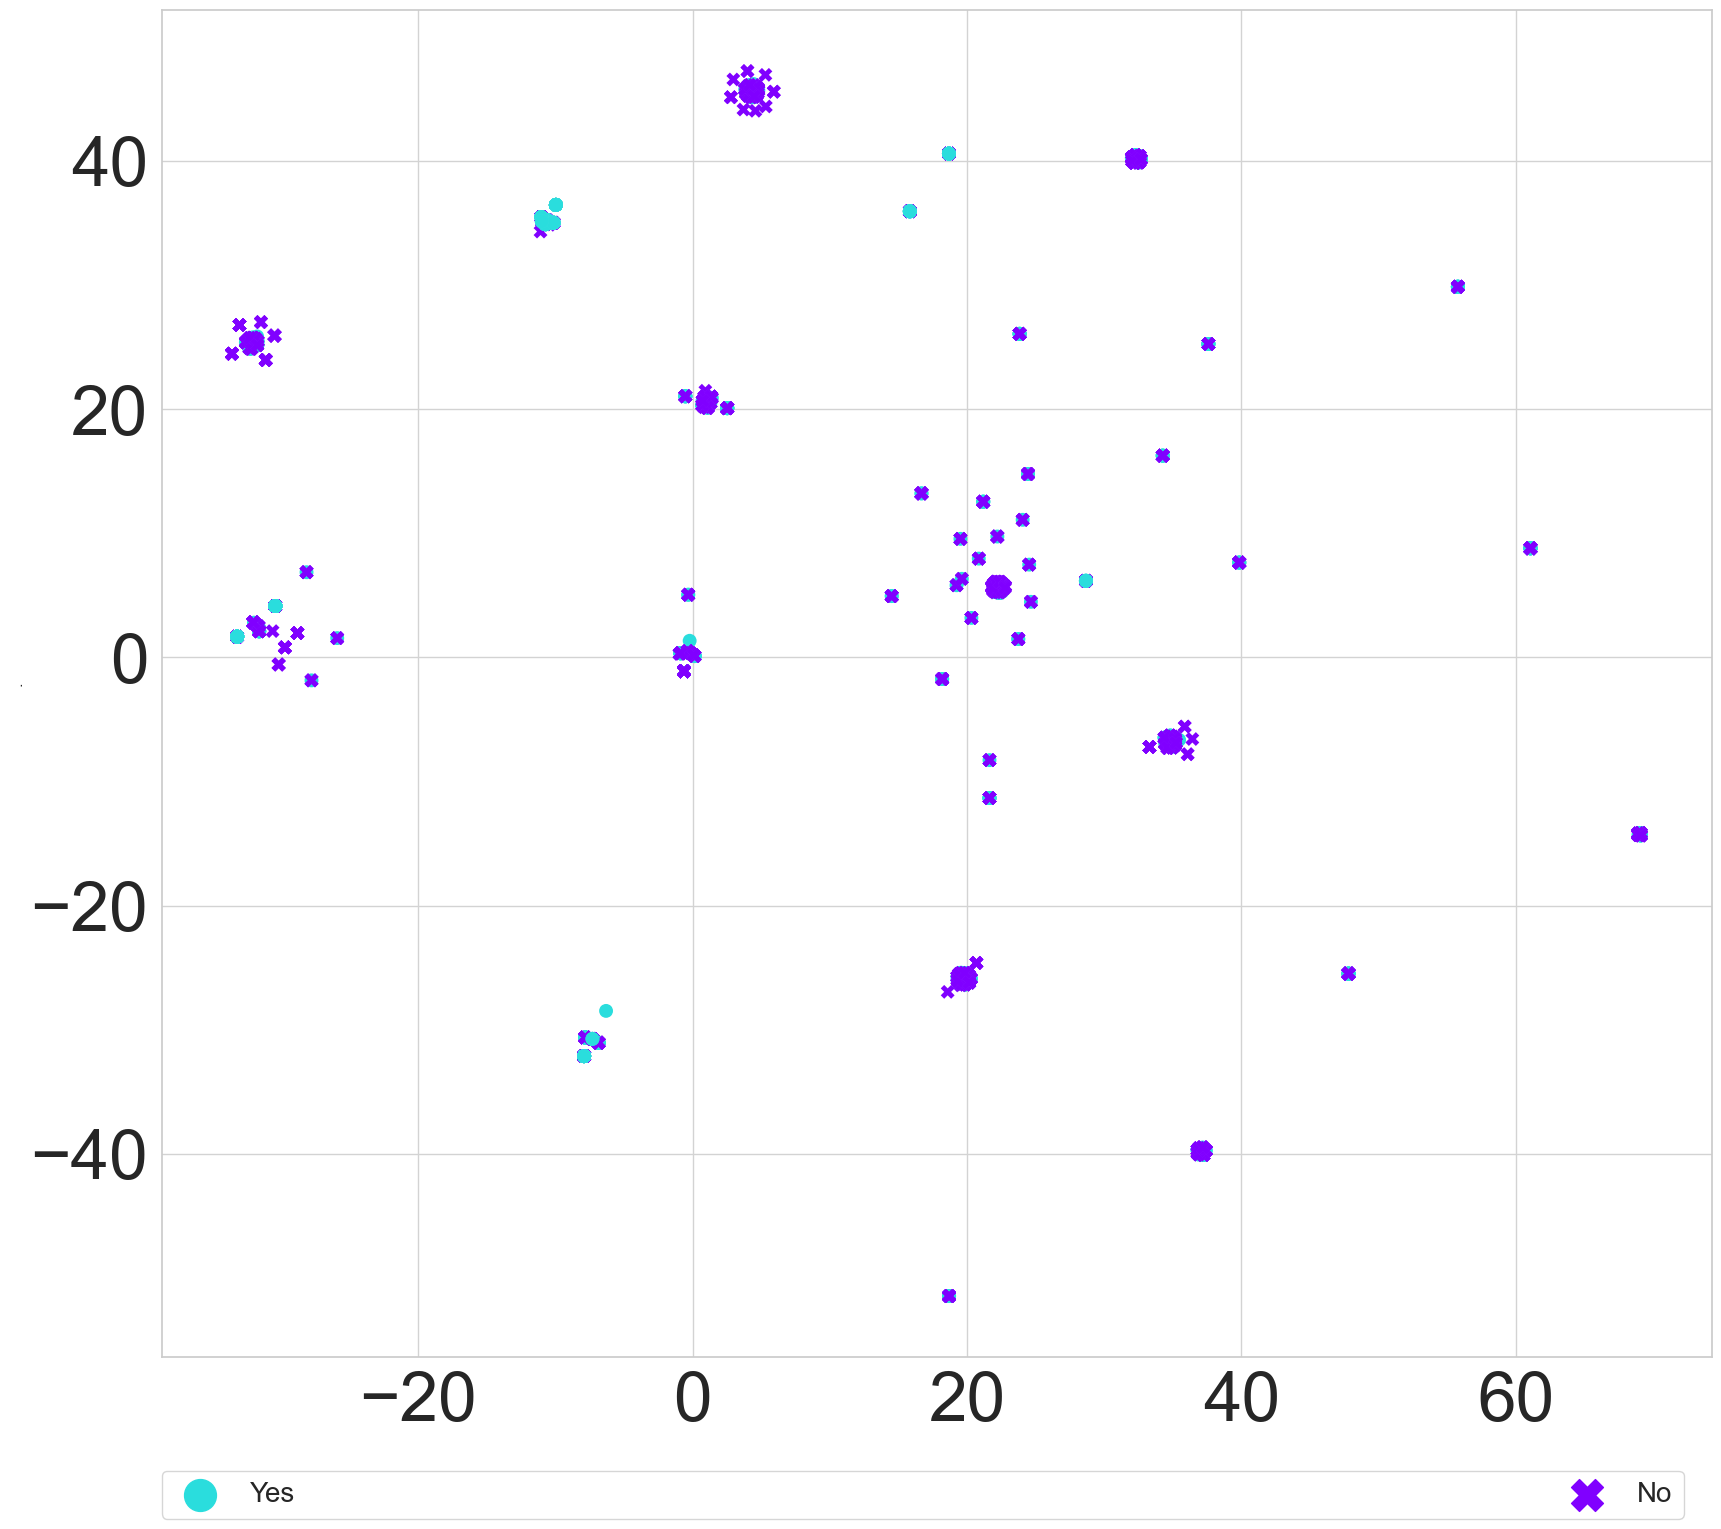

In [28]:

az = np.array(attribute_data)
X_embedded_orig_final2 = np.array(X_embedded)

colors = cm.rainbow(np.linspace(0, 1, len(np.unique(az))+2))
len(np.unique(az))

hst = np.unique(az)
order_top_hosts =  az

colors_top_hosts = {}

for key, value in zip(attr, colors):
    colors_top_hosts[key] = value

# colors_top_hosts = {'bat' : colors[0], 'bird' : colors[1],'bovine' : colors[2], 'camel' : colors[3],
#                    'canis' : colors[4], 'cat' : colors[5],'cattle' : colors[6], 'dolphin' : colors[7],
#                    'environment' : colors[8], 'equine' : colors[9],'fish' : colors[10], 'hedgehog' : colors[11],
#                    'human' : colors[12], 'monkey' : colors[13],'pangolin' : colors[14], 'python' : colors[15],
#                    'rat' : colors[16], 'swine' : colors[17],'turtle' : colors[18], 'unknown' : colors[19],
#                    'weasel' : colors[20]}

# colors_top_hosts = {'Colorectal' : colors[4], 'Urothelial' : colors[1],'Breast' : colors[0], 'Liver' : colors[5]}

data_frame_top_hosts = pd.DataFrame({' ': 
                                   np.array((X_embedded_orig_final2[:,0])), 
                           '.': np.array((X_embedded_orig_final2[:,1])), 
                           'Variants:': az})

sns.set(rc={'figure.figsize':(20,17.5),'axes.facecolor':'white', 'figure.facecolor':'white'})
sns.set_style("whitegrid", {'axes.grid': True, 'grid.linestyle': '-', 'grid.color': 'lightgrey'})

sns.scatterplot(x = ' ', 
            y = '.', 
            hue = 'Variants:', 
            hue_order = order_top_hosts,
#             markers = ordered_markers_top_hosts,
            palette = colors_top_hosts,
            data = data_frame_top_hosts,           
#             legend = 'full',
#             ax = ax12,
            s = 100,
            linewidth=0.01,
            style = 'Variants:')
# plt.ylim(-190, 99)
# plt.xlim(-80, 80)
# plt.xlabel("Steps Taken Per Day", fontsize=14)
# plt.ylabel("Calories Burned Per Day", fontsize=14)
plt.tick_params(labelsize=50)

lgnd = plt.legend(loc=[0,-0.12], scatterpoints=1, fontsize=20, mode = "expand", ncol = 2)
for handle in lgnd.legendHandles:
    handle.set_sizes([526.0])
    
# plt.legend([],[], frameon=False)
    
write_path = "E:/RA/Antigene_Antibody/Dataset/New/legend.png"
# write_path = "E:/RA/Antigene_Antibody/Dataset/New/" + name + ".png"

plt.savefig(write_path)

# Numerical Goodness AUC

In [79]:
# from sklearn.neighbors import NearestNeighbors

# from sklearn.manifold import TSNE
# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import time

# def getneighbours(datapoints, k):
#     neigh = NearestNeighbors(n_neighbors=k)
#     neigh.fit(datapoints)
#     k_neigbours = neigh.kneighbors(return_distance=False)
#     return k_neigbours

# def gettsne(datapoints, tsne):
#    # tsne = TSNE(n_components=2, verbose=1, random_state=123,perplexity=20)
#     z1 = tsne.fit_transform(datapoints)
#     return z1

In [80]:
# path = "E:/RA/IJCAI/Dataset/Original/"
# c_host_ohe = np.load(path + "first_kmers_freq_vec_seq_data_7000.npy",allow_pickle=True)



# # c_host_ohe = np.load("/alina-data1/taslim/tsne_host_10k_samples/PSSM2Vec_unaligned_Feature_vec.npy", allow_pickle=True)
# tsne = TSNE(n_components=2, verbose=1, random_state=123,perplexity=20)
# tsne_data = gettsne(c_host_ohe, tsne)

# print("t-SNE computation done")
# r_k_value = []
# k_list = []
# R_k_list = []
# start = time.time()

# for kVals in (n+1 for n in range(100)):
#     k = kVals
#     org_neigh = getneighbours(c_host_ohe, k)
    
#     tsne_neigh = getneighbours(tsne_data, k)

#     org_neigh = org_neigh.tolist()
#     tsne_neigh = tsne_neigh.tolist()

#     n = len(org_neigh)
#     res_list = []
#     for i in range(len(org_neigh)):
#         size_intersection = len(set(org_neigh[i]) & set(tsne_neigh[i]))
#         normalized_size_intersection = (size_intersection) / (k * n)
#         res_list.append(normalized_size_intersection)

#     Q_k = sum(res_list)
#     # print('Q(k) is ', Q_k)

#     R_k = (((n - 1) * (Q_k)) - k) / (n - 1 - k)

#     print('R(k) for k=', k, ' is ', R_k)
#     R_k_list.append(R_k/k)
#     k_list.append(1/k)

# end = time.time()
# print('time taken to run', (end - start))

# auc = (sum(R_k_list)) / (sum(k_list))

# print('AUC is ', auc)

In [81]:
# seq_data = np.load("E:/RA/IJCAI/Dataset/Original/Hasing_kmers_7000_Freq_vec_k_3.npy")

# pca_components = 500
# start = timeit.default_timer()
# svd = TruncatedSVD(n_components = pca_components, n_iter = 7, random_state = 42)
# frequency_vector = svd.fit_transform(seq_data)
# explained_variances = svd.explained_variance_ratio_

# stop = timeit.default_timer()
# time_final = stop - start
# print("PCA Done With Time : ", time_final)